# K-nearest neighbors

Airbnb dataset:
* host_response_rate: the response rate of the host
* host_acceptance_rate: number of requests to the host that convert to rentals
* host_listings_count: number of other listings the host has
* latitude: latitude dimension of the geographic coordinates
* longitude: longitude part of the coordinates
* city: the city the living space resides
* zipcode: the zip code the living space resides
* state: the state the living space resides
* accommodates: the number of guests the rental can accommodate
* room_type: the type of living space (Private room, Shared room or Entire home/apt
* bedrooms: number of bedrooms included in the rental
* bathrooms: number of bathrooms included in the rental
* beds: number of beds included in the rental
* price: nightly price for the rental
* cleaning_fee: additional fee used for cleaning the living space after the guest leaves
* security_deposit: refundable security deposit, in case of damages
* minimum_nights: minimum number of nights a guest can stay for the rental
* maximum_nights: maximum number of nights a guest can stay for the rental
* number_of_reviews: number of reviews that previous guests have left

In [1]:
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
dc_listings.head(1)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC


### Euclidean distance between two observations equals the square root of the sum of the square of the differences of their attributes:
* sqrt((q1 - p1)^2 + (q2 - p2)^2 ... + (qn - pn)^2) 

In [2]:
# calculate Euclidean distance between our living space (accomodates 3) and first listing in dataset using 'accommodates' as only feature

first_distance = abs(3 - dc_listings['accommodates'].iloc[0])
print(first_distance)

1


In [3]:
# Calculate Euclidean distance between our living space (accomodates 3) and every listing using 'accommodates'

dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: abs(x-3))
print(dc_listings['distance'].value_counts())
dc_listings['distance']

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


0       1
1       3
2       2
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      2
12      1
13      1
14      1
15      1
16      2
17      1
18      1
19      1
20      1
21      1
22      4
23      2
24      1
25      1
26      0
27      1
28      1
29      1
       ..
3693    2
3694    3
3695    1
3696    1
3697    0
3698    1
3699    1
3700    1
3701    1
3702    1
3703    3
3704    3
3705    2
3706    3
3707    0
3708    1
3709    1
3710    1
3711    1
3712    1
3713    2
3714    0
3715    2
3716    2
3717    4
3718    1
3719    1
3720    3
3721    1
3722    0
Name: distance, Length: 3723, dtype: int64

In [4]:
#Select 5 nearest neighbors based on 'accomodations' after shuffling dataset so that order isn't biased

import numpy as np
np.random.seed(1)

dc_listings = dc_listings.iloc[np.random.permutation(list(range(dc_listings.shape[0])))]
dc_listings = dc_listings.sort_values(by="distance")
dc_listings.head(10)['price']

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object

In [5]:
# Make price numeric
import re

dc_listings['price'] = dc_listings['price'].apply(lambda x: float(re.sub(r'[$,]','',x)))
mean_price = dc_listings['price'].iloc[:5].mean()
print(mean_price)

156.6


In [6]:
# Brought along the changes we made to the `dc_listings` Dataframe.
dc_listings = pd.read_csv('data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = dc_listings.copy()
    
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: abs(x-new_listing))
    temp_df.sort_values(by="distance",inplace=True)
    return temp_df['price'].iloc[:5].mean()

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

print("Acc one: {}\nAcc two: {}\nAcc four: {}".format(acc_one,acc_two,acc_four))

Acc one: 71.8
Acc two: 96.8
Acc four: 96.0


In [7]:
# Mission 2: Evaluating model performance

import pandas as pd
import numpy as np
dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# calculate MAE (mean absolute error)

mae = np.absolute(test_df['predicted_price'] - test_df['price']).sum()/test_df.shape[0]
mae

56.29001074113856

In [9]:
# calculate MSE (mean squared error).  Penalizes predictions that are way off much more than close predictions (e.g., error of 100 counts as 10000 and error of 10 counts as 100)

mse = sum((test_df['predicted_price'] - test_df['price'])**2)/test_df.shape[0]
print(mse)

18646.525370569325


In [10]:
# Implement k-nearest neighbors based on "bathrooms" column

train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(bathrooms):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: abs(x-bathrooms))
    temp_df.sort_values(by="distance", inplace=True)
    return temp_df['price'][:5].mean()

test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squared_error'].sum()/test_df.shape[0]
print(mse)

18405.44408163265


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# Calculating root mean squared error (RMSE: sqrt(MSE))

rmse = mse ** 0.5
print(rmse)

135.66666532952246


In [12]:
# Comparing properties of measures of error: MAE vs RMSE
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

mae_one = errors_one.sum()/len(errors_one)
rmse_one = (sum(errors_one ** 2)/len(errors_one)) ** 0.5

mae_two = errors_two.sum()/len(errors_two)
rmse_two = (sum(errors_two ** 2)/len(errors_two)) ** 0.5

print("Errors one:\nMAE: {}\tRMSE: {}".format(mae_one,rmse_one))
print("Errors two:\nMAE: {}\tRMSE: {}".format(mae_two,rmse_two))

Errors one:
MAE: 7.5	RMSE: 7.905694150420948
Errors two:
MAE: 62.5	RMSE: 235.82302686548658


In [13]:
# Mission 3: Multivariate K-Nearest Neighbors

import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('data/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

In [14]:
# Drop nonnumerical and ordinal data and data related to host not space

cols_to_remove = ["room_type",'city','state','latitude','longitude','zipcode','host_acceptance_rate','host_response_rate','host_listings_count']

dc_listings.drop(cols_to_remove, axis=1, inplace=True)

print(dc_listings.head())

      accommodates  bedrooms  bathrooms  beds  price cleaning_fee  \
574              2       1.0        1.0   1.0  125.0          NaN   
1593             2       1.0        1.5   1.0   85.0       $15.00   
3091             1       1.0        0.5   1.0   50.0          NaN   
420              2       1.0        1.0   1.0  209.0      $150.00   
808             12       5.0        2.0   5.0  215.0      $135.00   

     security_deposit  minimum_nights  maximum_nights  number_of_reviews  
574           $300.00               1               4                149  
1593              NaN               1              30                 49  
3091              NaN               1            1125                  1  
420               NaN               4             730                  2  
808           $100.00               2            1825                 34  


In [15]:
# Drop columns with lots of null values, and drop null values of columns with just a few

cols_to_remove = ['cleaning_fee','security_deposit']
dc_listings.drop(cols_to_remove, axis=1, inplace=True)
dc_listings.dropna(subset=['bedrooms','bathrooms','beds'],inplace=True)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [16]:
# Normalizing attributes to standard normal distribution (mean of 0, stdev of 1): for each point subtract mean and divide by stdev

normalized_listings = (dc_listings - dc_listings.mean())/(dc_listings.std())

normalized_listings['price'] = dc_listings['price']
print(normalized_listings.head(3))

      accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858  125.0       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858   85.0       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858   50.0       -0.341375   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  


In [17]:
# Computing Euclidean distance using scipy.spatial.distance.euclidean method

from scipy.spatial import distance

first_fifth_distance = distance.euclidean(normalized_listings[['accommodates','bathrooms']].iloc[0],normalized_listings[['accommodates','bathrooms']].iloc[4])

print(first_fifth_distance)

5.272543124668404


In [18]:
#Doing it myself

my_distance = ((normalized_listings['accommodates'].iloc[0] - normalized_listings['accommodates'].iloc[4]) ** 2 + (normalized_listings['bathrooms'].iloc[0] - normalized_listings['bathrooms'].iloc[4]) ** 2) ** 0.5

print(my_distance)



5.272543124668404


In [19]:
# Using scikit learn to perform multivariate K-neighbors regression

from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df[['accommodates','bathrooms']],train_df['price'])

predictions = knn.predict(test_df[['accommodates','bathrooms']])

rmse = (sum((test_df['price'] - predictions) ** 2)/test_df.shape[0]) ** 0.5
print(rmse)

125.02565961889567


In [20]:
# Using sklearn.metrics.mean_squared_error to calculate MSE and RMSE

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

train_columns = ['accommodates','bathrooms']

knn = KNeighborsRegressor(n_neighbors = 5, algorithm = "brute")

knn.fit(train_df[train_columns],train_df['price'])

predictions = knn.predict(test_df[train_columns])

two_features_mse = mean_squared_error(test_df['price'],predictions)
two_features_rmse = two_features_mse ** 0.5

print("With two features:\nMSE: {}\nRMSE: {}".format(two_features_mse,two_features_rmse))

With two features:
MSE: 15631.415563139932
RMSE: 125.02565961889556


In [21]:
# Building model with 4 features

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['accommodates','bedrooms','bathrooms','number_of_reviews']

knn = KNeighborsRegressor(n_neighbors=5, algorithm="brute")

knn.fit(train_df[features],train_df['price'])
four_predictions = knn.predict(test_df[features])

four_mse = mean_squared_error(test_df['price'],four_predictions)
four_rmse = four_mse ** 0.5

print("With four features:\nMSE: {}\nRMSE: {}".format(four_mse,four_rmse))

With four features:
MSE: 13460.036268486916
RMSE: 116.0173964045346


In [22]:
print(normalized_listings.corr()['price'])

features = ['accommodates','bedrooms','bathrooms','beds']

knn = KNeighborsRegressor(n_neighbors=5, algorithm="brute")
knn.fit(train_df[features],train_df['price'])
predictions = knn.predict(test_df[features])

mse = mean_squared_error(test_df['price'],predictions)
rmse = mse ** 0.5

print("With 'accommodates', 'bedrooms', 'bathrooms', and 'beds':\nMSE: {}\nRMSE: {}".format(mse,rmse))

accommodates         0.515931
bedrooms             0.527657
bathrooms            0.496411
beds                 0.464558
price                1.000000
minimum_nights       0.011519
maximum_nights       0.015163
number_of_reviews   -0.082843
Name: price, dtype: float64
With 'accommodates', 'bedrooms', 'bathrooms', and 'beds':
MSE: 16287.52081911263
RMSE: 127.62257174619477


In [23]:
# Utilizing all available features

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = [each for each in train_df.columns.values if each != 'price']

knn = KNeighborsRegressor(n_neighbors = 5, algorithm="brute")
knn.fit(train_df[features],train_df['price'])
all_features_predictions = knn.predict(test_df[features])

all_features_mse = mean_squared_error(test_df['price'],all_features_predictions)
all_features_rmse = all_features_mse ** 0.5

print("With all features:\nMSE: {}\nRMSE: {}".format(all_features_mse,all_features_rmse))

With all features:
MSE: 15343.983845278724
RMSE: 123.87083532970432


In [24]:
# Mission 4: Hyperparameter Optimization

import pandas as pd

train_df = pd.read_csv("data/dc_airbnb_train.csv")
test_df = pd.read_csv("data/dc_airbnb_test.csv")

In [25]:
# Trying from 1-5 number of neighbors

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ["accommodates","bedrooms",'bathrooms','number_of_reviews']
hyper_params = range(1,6)

mse_values = []

for each in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=each, algorithm="brute")
    knn.fit(train_df[features],train_df['price'])
    predictions = knn.predict(test_df[features])
    mse_values.append(mean_squared_error(test_df['price'],predictions))
    
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 16006.955844709897, 14114.812468714448]


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = range(1,21)
features = ["accommodates","bedrooms",'bathrooms','number_of_reviews']
mse_values = []

for each in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=each, algorithm="brute")
    knn.fit(train_df[features],train_df['price'])
    predictions = knn.predict(test_df[features])
    mse_values.append(mean_squared_error(test_df['price'],predictions))
    
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 16006.955844709897, 14114.812468714448, 13543.857887751232, 14285.285830373108, 14668.37078711604, 14603.355145437437, 14596.476951080776, 14667.816038134994, 14808.210379534821, 14703.662371845363, 14776.279184369996, 14765.986120591582, 14849.175310189135, 14800.645440910755, 14750.895198668522, 14731.226585864699, 14648.419749715586]


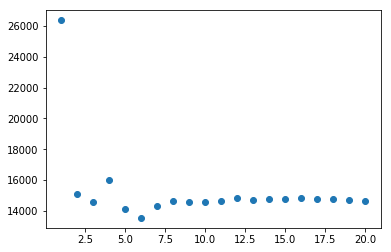

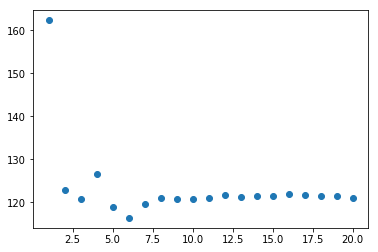

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = range(1, 21)
mse_values = list()
rmse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    rmse_values.append(mse**0.5)
    
plt.scatter(hyper_params, mse_values)
plt.show()

plt.scatter(hyper_params, rmse_values)
plt.show()

[23303.759954493744, 14917.940273037542, 15006.17772721527, 15477.679536405005, 15286.060341296927, 15484.882442169133, 14955.637598384066, 15121.261127701933, 15075.432716751639, 14826.446894197952, 14721.343572241181, 14804.630056250791, 14875.420757854206, 14969.454888440017, 14960.892878270763, 15071.190837421786, 15096.145513736516, 15266.2938875546, 15218.578975731045, 15212.8344596132]


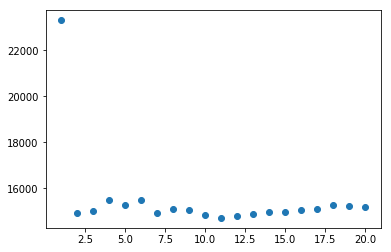

In [33]:
# Retrying all neighbors from 1-20 with all features included except price

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = [each for each in train_df.columns.values if each != "price"]
hyper_params = [x for x in range(1,21)]
mse_values = list()

for each in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=each, algorithm="brute")
    knn.fit(train_df[features],train_df['price'])
    predictions = knn.predict(test_df[features])
    mse_values.append(mean_squared_error(test_df['price'],predictions))
    
print(mse_values)

plt.scatter(hyper_params,mse_values)
plt.show()

In [40]:
# Undergoing hyperparameter optimization for two and three feature models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = hp, algorithm="brute")
    features = [two_features, three_features]
    for i, feat in enumerate(features):
        knn.fit(train_df[feat],train_df['price'])
        predictions = knn.predict(test_df[feat])
        mse = mean_squared_error(test_df['price'],predictions)
        if i == 0:
            two_mse_values.append(mse)
        elif i == 1:
            three_mse_values.append(mse)
                
min2 = min(two_mse_values)
two_hyp_mse[two_mse_values.index(min2)+1] = min2
min3 = min(three_mse_values)
three_hyp_mse[three_mse_values.index(min3)+1] = min3


print(two_hyp_mse,three_hyp_mse)

{5: 14787.264345847556} {7: 13518.769009310208}


In [42]:
#Challenge: cross validation

import numpy as np
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

dc_listings = dc_listings.loc[np.random.permutation(dc_listings.index.values)]

split_one = dc_listings.iloc[:1862]
split_two = dc_listings.iloc[1862:]

In [51]:
# cross-validation

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
train = [train_one, train_two]
test = [test_one, test_two]
rmses = []

for i, each in enumerate(train):
    knn = KNeighborsRegressor(n_neighbors=5, algorithm="auto")
    knn.fit(train[i][["accommodates"]],train[i]['price'])
    predictions = knn.predict(test[i][['accommodates']])
    rmses.append(mean_squared_error(test[i]['price'],predictions)**0.5)
    
iteration_one_rmse = rmses[0]
iteration_two_rmse = rmses[1]

avg_rmse = np.mean(rmses)

print(iteration_one_rmse,iteration_two_rmse,avg_rmse)

131.6207283081407 128.77209995637674 130.19641413225872


In [52]:
# K-fold cross validation with 5 folds
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

print(dc_listings["fold"].value_counts())
print(dc_listings["fold"].isnull().sum())

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64
0


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors = 5, algorithm="auto")

train_one = dc_listings[dc_listings['fold'] != 1]
test_one = dc_listings[dc_listings['fold'] == 1]
knn.fit(train_one[['accommodates']],train_one['price'])
labels = knn.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'],labels)**0.5

In [55]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

def train_and_validate(df, folds):
    rmses = []
    
    for each in folds:
        train_df = df[df['fold'] != each]
        test_df = df[df['fold'] == each]
        
        knn = KNeighborsRegressor()
        knn.fit(train_df[['accommodates']],train_df['price'])
        labels = knn.predict(test_df[['accommodates']])
        rmses.append(mean_squared_error(test_df['price'],labels)**0.5)
    return rmses

rmses = train_and_validate(dc_listings,fold_ids)
avg_rmse = np.mean(rmses)
print(rmses, avg_rmse)

[112.04826596623559, 144.38561957805769, 124.88396829711334, 136.89503611883998, 112.45994078728297] 126.13456614950594


In [63]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits = 5, shuffle=True, random_state=1)

knn = KNeighborsRegressor(n_neighbors=5, algorithm="auto")
mses = cross_val_score(knn,dc_listings[['accommodates']],dc_listings['price'],scoring="neg_mean_squared_error",cv=kf)

rmses = np.absolute(mses)**0.5
avg_rmse = np.mean(rmses)
print(avg_rmse)

129.01866963719164
